In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('zoo.csv')

In [3]:
data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
data.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [6]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

# Preprocessing

In [8]:
data.drop("animal_name",axis=1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   hair        101 non-null    int64
 1   feathers    101 non-null    int64
 2   eggs        101 non-null    int64
 3   milk        101 non-null    int64
 4   airborne    101 non-null    int64
 5   aquatic     101 non-null    int64
 6   predator    101 non-null    int64
 7   toothed     101 non-null    int64
 8   backbone    101 non-null    int64
 9   breathes    101 non-null    int64
 10  venomous    101 non-null    int64
 11  fins        101 non-null    int64
 12  legs        101 non-null    int64
 13  tail        101 non-null    int64
 14  domestic    101 non-null    int64
 15  catsize     101 non-null    int64
 16  class_type  101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


## Splitting and Scaling

In [10]:
y = data['class_type']
X = data.drop('class_type', axis=1)

In [11]:
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [12]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hair      101 non-null    float64
 1   feathers  101 non-null    float64
 2   eggs      101 non-null    float64
 3   milk      101 non-null    float64
 4   airborne  101 non-null    float64
 5   aquatic   101 non-null    float64
 6   predator  101 non-null    float64
 7   toothed   101 non-null    float64
 8   backbone  101 non-null    float64
 9   breathes  101 non-null    float64
 10  venomous  101 non-null    float64
 11  fins      101 non-null    float64
 12  legs      101 non-null    float64
 13  tail      101 non-null    float64
 14  domestic  101 non-null    float64
 15  catsize   101 non-null    float64
dtypes: float64(16)
memory usage: 12.8 KB


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=0)

### Training 

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = log_model.predict(X_test)  

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})          #Comparison between predicted and test data
df 

,Actual,Predicted
26,5,5
86,4,4
2,4,4
55,1,1
75,1,1
94,1,1
16,2,2
73,4,4
54,1,1
96,1,1


In [18]:
from sklearn.metrics import confusion_matrix

Con_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",Con_matrix )

Confusion Matrix: 
 [[11  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  2]]


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
#print('Classification report : \n',report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       0.67      1.00      0.80         2

    accuracy                           0.94        31
   macro avg       0.93      0.86      0.87        31
weighted avg       0.95      0.94      0.93        31



In [20]:
from sklearn.metrics import accuracy_score

print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.9354838709677419


In [21]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='micro')
print('Recall: %.3f' % recall)

Recall: 0.935


In [22]:
from sklearn import metrics

cm=metrics.confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  2]], dtype=int64)

In [23]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, labels=[1,2], average='micro')
print('Precision: %.3f ' % precision)

Precision: 1.000 


### SVM Model

In [24]:
from sklearn.svm import SVC                 #importing model SVC
model = SVC(kernel="rbf", C=1)                 #declaring model
model.fit(X_train,y_train)
ypred = model.predict(X_test)

Accuracy of model is : 0.9354838709677419


<AxesSubplot:>

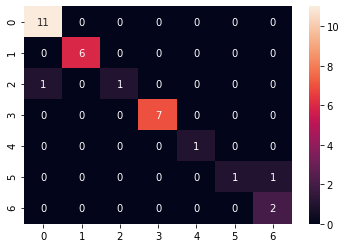

In [25]:
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

acc=accuracy_score(y_test,ypred)            #accuracy- evaluation of classification model

cm=confusion_matrix(y_test,ypred)            #confusion matrix

print("Accuracy of model is :",acc)
sns.heatmap(cm,annot=True)

In [26]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       0.67      1.00      0.80         2

    accuracy                           0.94        31
   macro avg       0.94      0.86      0.87        31
weighted avg       0.95      0.94      0.93        31



In [27]:
from sklearn.metrics import accuracy_score

print("Accuracy Score:",accuracy_score(y_test,ypred))

Accuracy Score: 0.9354838709677419


In [28]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,ypred, average='micro')
print('Recall: %.3f' % recall)

Recall: 0.935


In [29]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, ypred, labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

Precision: 0.944


### KNN Algorithm

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
ypred1=model.predict(X_test)
ypred1

array([5, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 6, 2, 4, 2, 3,
       1, 2, 1, 1, 1, 2, 4, 4, 4], dtype=int64)

In [32]:
#accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc = accuracy_score(y_test,ypred1)
acc

0.967741935483871

In [33]:
#confusion Matrix
cm = confusion_matrix(y_test,ypred1)
cm

array([[11,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  2]], dtype=int64)

In [34]:
#classification_report
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.97        31
   macro avg       0.98      0.93      0.94        31
weighted avg       0.97      0.97      0.96        31



In [35]:
#model Estimator
model=KNeighborsClassifier()

In [36]:
#parameter grid
#n_neighbors,metric,weights
n_neighbors=range(1,31)
metric=["euclidean","manhattan","minkowski"]
weights=['uniform','distance']
grid={"n_neighbors":n_neighbors,"metric":metric,"weights":weights}

In [37]:
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
kfold=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)

In [38]:
#Grid Search cv
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=kfold,scoring="accuracy",n_jobs=1)

In [56]:
#result
res=grid_cv.fit(X_train,y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [40]:
res.best_params_

{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}

In [41]:
res.best_score_

0.9523809523809524

In [42]:
#{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
model_best=KNeighborsClassifier(metric='manhattan',n_neighbors=8,weights='distance')
model_best.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')

In [43]:
ypred_best=model_best.predict(X_test)
ypred

array([5, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 7, 2, 4, 2, 3,
       1, 2, 1, 1, 1, 2, 4, 1, 4], dtype=int64)

In [44]:
acc=accuracy_score(y_test,ypred_best)
acc

0.967741935483871

# AdaBoost

In [45]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.6129032258064516

In [46]:
from sklearn.ensemble import AdaBoostRegressor
model_1 = AdaBoostRegressor()
model_1.fit(X_train, y_train)
model_1.score(X_test,y_test)

0.9721705223956955

In [47]:
ypred = model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("Accuracy is :",accuracy_score(y_test,ypred))

Accuracy is : 0.6129032258064516


In [48]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.14      1.00      0.25         2

    accuracy                           0.61        31
   macro avg       0.31      0.43      0.32        31
weighted avg       0.56      0.61      0.56        31



C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix
[[11  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  7]
 [ 0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  2]]


<AxesSubplot:>

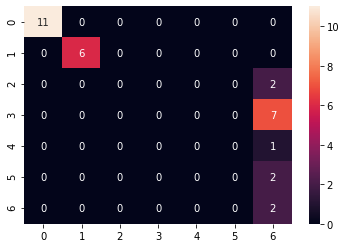

In [49]:
cm=confusion_matrix(y_test,ypred)
print("Confusion Matrix")
print(cm)
sns.heatmap(cm,annot=True)

# Gradient Boosting (GBM)

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [51]:
ypred=model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy is :",accuracy_score(y_test,ypred))

Accuracy is : 1.0


In [53]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [54]:
cm=confusion_matrix(y_test,ypred)
cm

array([[11,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  2]], dtype=int64)

<AxesSubplot:>

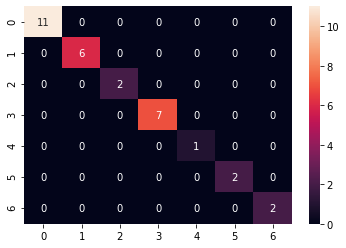

In [55]:
sns.heatmap(cm,annot=True)